# run vscode as Administrator

In [1]:
import soundfile as sf
import matplotlib.pyplot as plt

from simple_diarizer.diarizer import Diarizer
from simple_diarizer.utils import combined_waveplot

d:\AA_develop\Diarization\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:speechbrain.utils.quirks:Applied quirks (see `speechbrain.utils.quirks`): [allow_tf32, disable_jit_profiling]
INFO:speechbrain.utils.quirks:Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
d:\AA_develop\Diarization\myenv\Lib\site-packages\simple_diarizer\diarizer.py:9: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  from speechbrain.pretrained import EncoderClassifier


In [2]:
diar = Diarizer(
                  embed_model='xvec', # 'xvec' and 'ecapa' supported
                  cluster_method='sc' # 'ahc' and 'sc' supported
               )
diar

Using cache found in C:\Users\jongb/.cache\torch\hub\snakers4_silero-vad_master
INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/spkrec-xvect-voxceleb' if not cached
d:\AA_develop\Diarization\myenv\Lib\site-packages\speechbrain\utils\fetching.py:151: UserWarning: Using SYMLINK strategy on Windows for fetching potentially requires elevated privileges and is not recommended. See `LocalStrategy` documentation.
  warnings.warn(
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-xvect-voxceleb' if not cached
d:\AA_develop\Diarization\myenv\Lib\site-packages\speechbrain\utils\autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
d:\AA_develop\Diarization\myenv\Lib\site-packages\speechbrain\utils\parameter_transfer.py:234: Use

In [3]:
WAV_FILE = "./audio_files/test01.wav"
NUM_SPEAKERS = 2
segments = diar.diarize(WAV_FILE, num_speakers=NUM_SPEAKERS)
segments

Converting audio file to single channel WAV using ffmpeg...
Running VAD...
Splitting by silence found 3 utterances
Extracting embeddings...


Utterances: 100%|██████████| 3/3 [00:00<00:00,  8.12it/s]
d:\AA_develop\Diarization\myenv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


Clustering to 2 speakers...
Cleaning up output...
Done!


[{'start': np.float64(0.45),
  'end': np.float64(2.325),
  'label': np.int32(1),
  'start_sample': np.int64(7200),
  'end_sample': np.int64(37200)},
 {'start': np.float64(2.325),
  'end': np.float64(5.1819375),
  'label': np.int32(0),
  'start_sample': np.int64(37200),
  'end_sample': np.int64(82911)},
 {'start': np.float64(5.282),
  'end': np.float64(5.6619375),
  'label': np.int32(1),
  'start_sample': np.int64(84512),
  'end_sample': np.int64(90591)},
 {'start': np.float64(6.594),
  'end': np.float64(15.1659375),
  'label': np.int32(0),
  'start_sample': np.int64(105504),
  'end_sample': np.int64(242655)}]

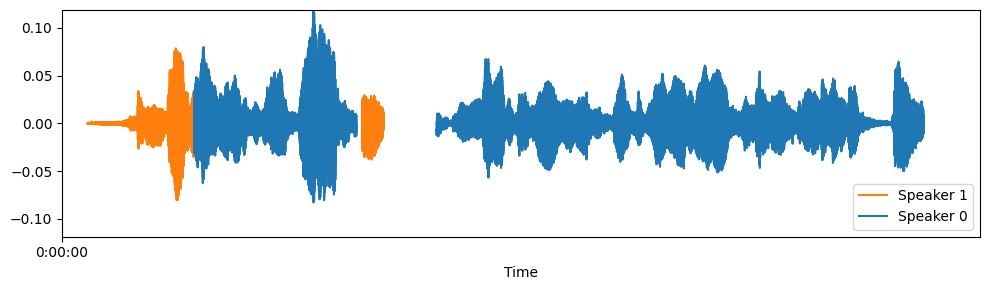

<Figure size 1500x200 with 0 Axes>

In [4]:
signal, fs = sf.read(WAV_FILE)
combined_waveplot(signal, fs, segments)
plt.figure(figsize=(15,2))
plt.show()